In [64]:
"""from google.colab import files

uploaded = files.upload()"""

'from google.colab import files\n\nuploaded = files.upload()'

In [65]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score)

In [66]:
data = pd.read_csv("Titanic.csv")

In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
#Abhängige Variablen in 0 und 1 umbenennen, in diesem Fall nicht notwendig
#data['Class'] = data['Class'].replace({8: 0, 9: 1})

In [69]:
#short_list = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare']
short_list = ['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare']

In [70]:
#data = data.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare'])
data = data.dropna(subset=short_list)

In [71]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train["Survived"] = y_train
X_test["Survived"] = y_test

In [73]:
#0 = No 1 = Yes
#X_test = X_test[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

#model = smf.logit('Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Embarked + Fare', data=X_train).fit() #original
model = smf.logit('Survived ~ C(Pclass) + C(Sex) + Age + Fare', data=X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.437708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  571
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                  0.3533
Time:                        12:43:18   Log-Likelihood:                -249.93
converged:                       True   LL-Null:                       -386.45
Covariance Type:            nonrobust   LLR p-value:                 6.256e-57
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3637      0.560      7.790      0.000       3.266       5.462
C(Pclass)[T.2]   

In [74]:
np.exp(model.params)

Intercept         78.548824
C(Pclass)[T.2]     0.191373
C(Pclass)[T.3]     0.064467
C(Sex)[T.male]     0.067371
Age                0.955719
Fare               0.998859
dtype: float64

In [75]:
1/np.exp(model.params)

Intercept          0.012731
C(Pclass)[T.2]     5.225404
C(Pclass)[T.3]    15.511772
C(Sex)[T.male]    14.843291
Age                1.046333
Fare               1.001142
dtype: float64

In [76]:
#newpred = pd.DataFrame({"Sex": ["female"], "Age": [20]})
newpred = pd.DataFrame({"Pclass": [1], "Sex": ["female"], "Embarked": ["S"], "Age": [20], "SibSp": [0], "Parch": [0], "Fare": [0]})
model.predict(newpred)

0    0.969465
dtype: float64

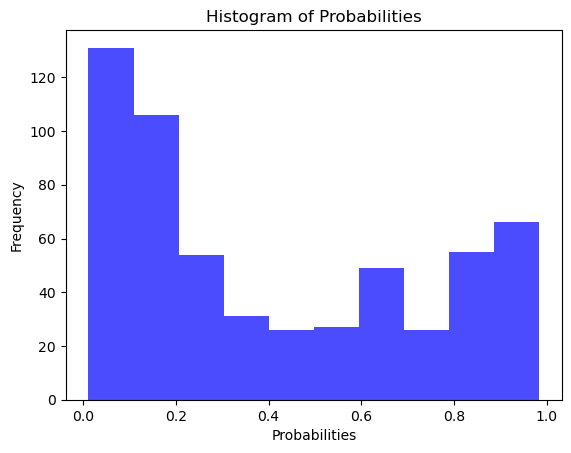

In [77]:
proba = 1 / (1 + np.exp( - model.fittedvalues ))

plt.hist(proba, bins=10, alpha=0.7, color='blue')
plt.xlabel('Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.show()


In [78]:
print(len(X_train.loc[X_train['Survived'] == 0]))
print(len(X_train.loc[X_train['Survived'] == 1]))

337
234


In [79]:
#X_test = X_test[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare']]
X_test = X_test[short_list]

yhat = model.predict(X_test)
prediction = list(map(round, yhat))

print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Predictions : [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [80]:
# Oben links: True negatives
# Oben rechts: False positives
# Unten links: False negatives
# Unten rechts: True positives

cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[67 20]
 [17 39]]
Test accuracy =  0.7412587412587412


Q: What is "parch"?
</br> A: Parch - how many children & parents of the passenger aboard the Titanic.

Q: What does "embarked" mean?
</br> A: Where the traveler mounted from

In [83]:
#X_test = X_test[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare']] #original
X_test = X_test[short_list]

yhat = model.predict(X_test)
prediction = list(map(round, yhat))

print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Predictions : [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [82]:
# Oben links: True negatives
# Oben rechts: False positives
# Unten links: False negatives
# Unten rechts: True positives

cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[67 20]
 [17 39]]
Test accuracy =  0.7412587412587412
